
# Transient CSTR



-   We can model the startup of a CSTR as an ordinary differential equation. We start with the usual mole balance:

\begin{equation}
\frac{dN_A}{dt} = F_{A0} - F_A + V r_A
\end{equation}

-   and an initial condition on the concentration of $A$ in the reactor.

-   Suppose that the reactor starts out full of solvent, with no $A$ present $C_A(t=0) = 0   $.  The reactor is at constant volume, so we rewrite the mole balance as:

\begin{equation}
\frac{dC_A}{dt} = F_{A0}/V - F_A/V + r_A
\end{equation}

-   We will presume a first order reaction, $r_A = -k C_A$ with $k=0.11$ 1/min. $A$ flows into the reactor at a concentration of 0.5 mol/L at a rate of 1.5 L/min. The reactor is 2 L in volume.

-   Let us plot the exit concentration as a function of time.



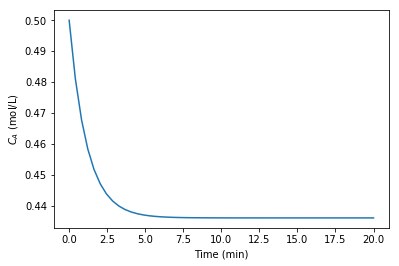

In [1]:
import numpy as np
from scipy.integrate import odeint

CAin = 0.5  # mol/L
v0 = 1.5   # L/min
V = 2.0    # reactor volume (L)

FA0 = CAin * v0  # molar flow of A into the reactor

k = 0.11   # rate constant (1/min)

def dCadt(Ca, t):
    rA = -k * Ca
    Fa = v0 * Ca
    return FA0 / V - Fa / V + rA

tspan = np.linspace(0.0, 20.0)
Ca0 = 0.5  # initial condition in the tank
sol = odeint(dCadt, Ca0, tspan)

import matplotlib.pyplot as plt
plt.plot(tspan, sol)
plt.xlabel('Time (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.savefig('images/transient-cstr.png')
plt.show()

-   You can see that the concentration initially increases
    -   That is because the tank is initially empty and the molar flow in is larger than the molar consumption rate

-   Eventually a steady state concentration occurs

-   In this case, the conversion is low because the reaction rate is slow

How do we know the reaction rate is slow? Slow compared to what?



In [2]:
V = 2.0  # liters
v0 = 1.5  # L/min

k = 0.11  # 1 / min

print('Residence time = {}'.format(V / v0))
# this is for a 1st order reaction
print('Reaction time scale = {}'.format(1 / k))

Residence time = 1.3333333333333333
Reaction time scale = 9.090909090909092


-   So, the reaction time is much longer than the residence time

-   Note that unlike solving for the steady state solution using `fsolve`, here we do not need an initial guess.
    -   Instead, we start with an initial condition that is known

-   There are scenarios where there are multiple steady state solutions.
    -   In those cases the solution you get depends on the initial conditions
    -   This is analogous to the solution depending on the initial guess in a non-linear algebra problem

-   Also note, you cannot use conversion to solve this problem.

-   The concentration is changing at early times because of the flow into the reactor.



In [3]:
import numpy as np
from scipy.optimize import fsolve

CAin = 0.5  # mol/L
v0 = 1.5   # L/min
V = 2.0    # reactor volume (L)

FA0 = CAin * v0  # molar flow of A into the reactor

# k = 0.11   # rate constant (1/min)

def dCadt(Ca, t, k):
    rA = -k * Ca
    Fa = v0 * Ca
    return FA0 / V - Fa / V + rA

ans2 = fsolve(dCadt, 0.5, args=(0, 0.11))
print(ans2)
print(list(ans2))

print(np.array([fsolve(dCadt, 0.5, args=(0, k)) for k in np.linspace(0.1, 1.0, 10)]))


results = []
for k in [0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77]:
   def obj2(Ca):
       rA = -k * Ca
       Fa = v0 * Ca
       return FA0 / V - Fa / V + rA

#   results.append(fsolve(obj2, 0.5)[0])

   results += [fsolve(obj2, 0.5)[0]]
#   results = results + [fsolve(obj2, 0.5)[0]]
print(results)

[ 0.43604651]
[0.43604651162790697]
[[ 0.44117647]
 [ 0.39473684]
 [ 0.35714286]
 [ 0.32608696]
 [ 0.3       ]
 [ 0.27777778]
 [ 0.25862069]
 [ 0.24193548]
 [ 0.22727273]
 [ 0.21428571]]
[0.43604651162790697, 0.38659793814432986, 0.34722222222222221, 0.31512605042016806, 0.28846153846153844, 0.26595744680851063, 0.24671052631578946]



# Multiple steady states in a CSTR



-   Let us examine one case where there are multiple steady state solutions.

-   When rate laws are sufficiently non-linear, it becomes possible to have multiple steady state solutions.

-   If we have a reaction of $A$ to products, following the rate law $-r_A = \frac{1.75 C_A}{(1 + 10 C_A)^2}$ (with overall units of mol / L /min), then under some conditions it may be possible to observe multiple steady states.
    -   This kind of rate law occurs when adsorption and surface intermediates determine the rate, or in enzyme kinetics

-   We consider the steady state operation of a CSTR: $0 = F_{A,in} - F_{A} + r_A V$.

-   The inlet concentration of $A$ is 1.5 mol/L, at a volumetric flow of 0.15 L/min

-   The reactor volume if 5 L.

-   We define our objective function, and plot it over the range of possible concentrations of $A$



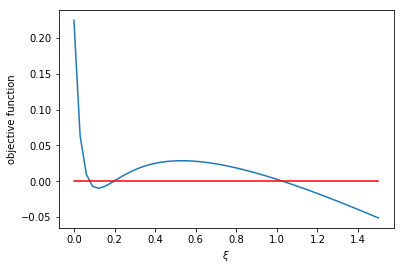

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Ca0 = 1.5  # mol / L
v0 = 0.15  # L / min
V = 5      # L

Fa0 = Ca0 * v0


def objective(Ca):
    Fa = Ca * v0
    ra = -1.75 * Ca / (1 + 10 * Ca)**2
    return Fa0 - Fa + ra * V

Caspan = np.linspace(0, Ca0)

xi = (Caspan - Ca0) / (-1) / Ca0  # normalized reaction extent
plt.plot(Caspan, objective(Caspan))
plt.plot([min(Caspan), max(Caspan)], [0, 0], 'r-')

# Note the r' notation. This indicates a raw string, where no characters are
# escaped. some strings like \n stand for newline, \t for tab, etc...
# Alternatively you can escape the \ with another \ like this:
# plt.xlabel('$\\xi$')
plt.xlabel('$\\xi$')

plt.ylabel('objective function')
plt.savefig('images/multiple-steady-states.png')
plt.show()

-   You can see that there are three places where the objective function is equal to zero.
    -   At approximately $C_A = 0.05, 0.19, 1.0$
    -   These correspond to a high conversion, medium conversion, and low conversion steady state solution.

-   That means there are three steady state solutions

-   This occurs because of the nonlinear nature of the objective function

-   Let us solve the objective function three times with different guesses:



In [5]:
import numpy as np
from scipy.optimize import fsolve

Ca0 = 1.5  # mol / L
v0 = 0.15  # L/min
V = 5      # L

Fa0 = Ca0 * v0  # molar flow of A into reactor


def objective(Ca):
    Fa = Ca * v0
    ra = -1.75 * Ca / (1 + 10 * Ca)**2
    return Fa0 - Fa + ra * V

print('steady state 1 = {0}'.format(fsolve(objective, 0.05)))
print('steady state 2 = {}'.format(fsolve(objective, 0.19)))
print('steady state 3 = {}'.format(fsolve(objective, 1.0)))

steady state 1 = [ 0.0740589]
steady state 2 = [ 0.19680782]
steady state 3 = [ 1.02913327]


-   A natural question might be which one is correct?
    -   They are all mathematical solutions to the mole balance!

-   A better question is which ones are stable?

-   You will not always observe multiple steady states, even for this reaction. If the reaction rate constant is different, or the volumetric flow is different, or inlet concentrations are different, then you may only observe one steady state.

